# 110. Architecture Diagrams with Python

In [1]:
!pip install diagrams -q

In [3]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Web Service", show=False):
    ELB("lb") >> EC2("web") >> RDS("userdb")

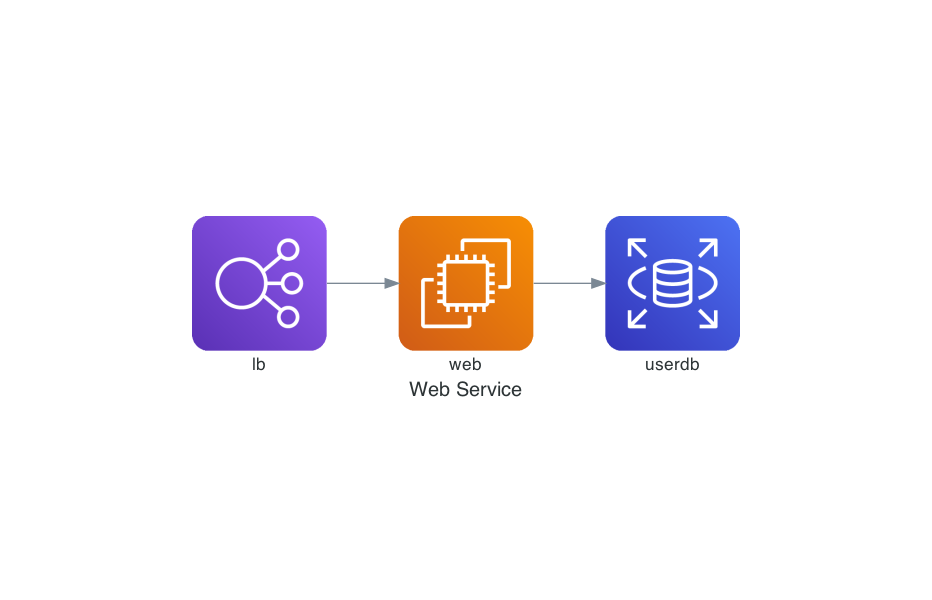

In [2]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS
from diagrams.aws.database import ElastiCache, RDS
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53

with Diagram("Clustered Web Services", show=False):
    dns = Route53("dns")
    lb = ELB("lb")

    with Cluster("Services"):
        svc_group = [ECS("web1"),
                     ECS("web2"),
                     ECS("web3")]

    with Cluster("DB Cluster"):
        db_primary = RDS("userdb")
        db_primary - [RDS("userdb ro")]

    memcached = ElastiCache("memcached")

    dns >> lb >> svc_group
    svc_group >> db_primary
    svc_group >> memcached

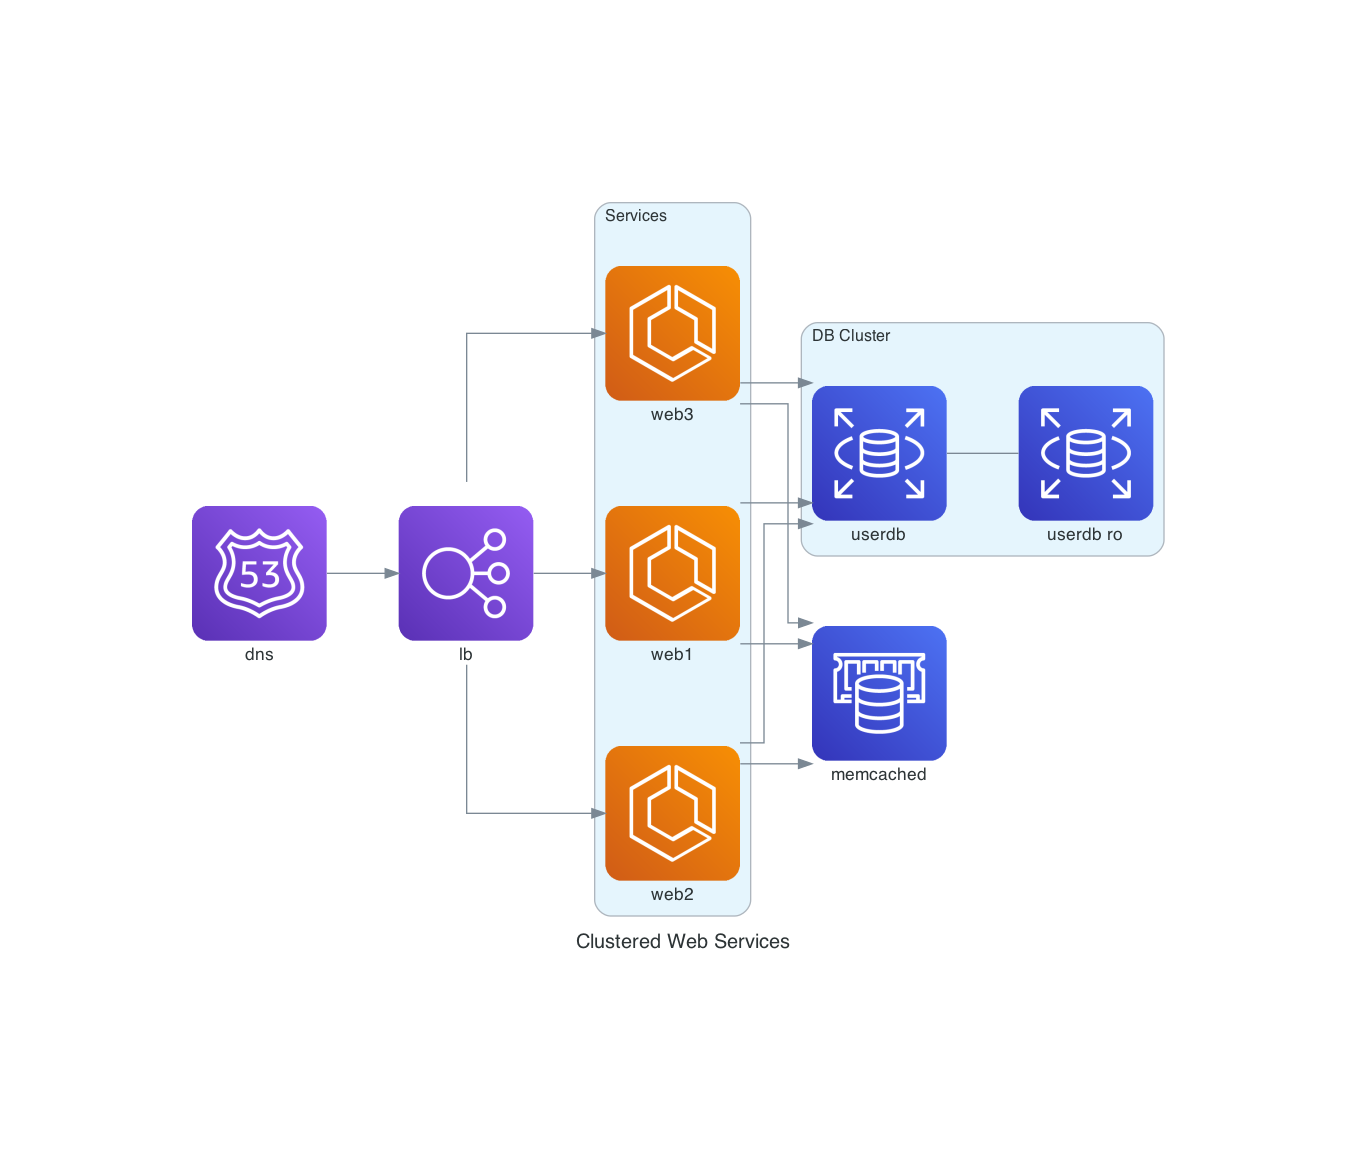